# 범죄 분석

## 사전 준비

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# PC에서 그림 설정
plt.rcParams.update({'figure.dpi': '100'})
plt.rcParams.update({'figure.figsize': [6, 4]})

In [ ]:
# PC에서 한글 설정
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
# 그림 선명하게
%config InlineBackend.figure_format = 'retina'

In [ ]:
# 데이터프레임의 소수점 이하 n(2)자리 출력 설정
pd.set_option('display.precision', 2)

In [ ]:
from IPython.display import display_html
def display_side_by_side(*args):
    """여러 데이터프레임 비교가 쉽게 옆쪽으로 표시한다"""
    html_str=''
    for df in args:
        html_str += df.to_html() + '&nbsp;'*4
    display_html(html_str.replace('table','table style="display:inline"'), raw=True)

In [ ]:
# 필요한 라이브러리 불러오기
# 파일 불러오기 + 지수 표기 방지 설정
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt

# 숫자 지수 표기 끄기
pd.options.display.float_format = '{:,.0f}'.format

# 파일 불러오기
file_list = glob.glob('../CrimeData/범죄발생장소(2012~2023)/*.csv')

df_list = []

for file_path in file_list:
    filename = os.path.basename(file_path)
    year = int(''.join(filter(str.isdigit, filename)))  # 연도 추출

    try:
        df = pd.read_csv(file_path, encoding='utf-8')
    except UnicodeDecodeError:
        df = pd.read_csv(file_path, encoding='cp949')

    df['year'] = year
    df_list.append(df)

# 결합
full_df = pd.concat(df_list, ignore_index=True)

# 🔍 정확한 장소 열 추출 (2번째 이후부터 마지막 열 전까지)
place_columns = full_df.columns[2:-1].tolist()

# year가 포함됐는지 확인하고 제거
if 'year' in place_columns:
    place_columns.remove('year')



In [ ]:
# 연도별 전체 범죄 합계 계산
total_by_year = (
    full_df
    .groupby('year')[place_columns]
    .sum()
    .sum(axis=1)
    .reset_index(name='전체범죄건수')
)

# 연도별 강력범죄 합계 계산
violent_df = full_df[full_df['범죄대분류'] == '강력범죄']
violent_by_year = (
    violent_df
    .groupby('year')[place_columns]
    .sum()
    .sum(axis=1)
    .reset_index(name='강력범죄건수')
)

# 연도별 요약표
summary_df = pd.merge(total_by_year, violent_by_year, on='year')
summary_df


,year,전체범죄건수,강력범죄건수
0,2012,"1,793,400","25,149"
1,2014,"1,778,966","25,277"
2,2015,"1,861,657","25,334"
3,2016,"1,849,450","25,765"
4,2017,"1,478,584","27,274"
5,2018,"1,580,751","26,787"
6,2019,"1,611,906","26,476"
7,2020,"1,587,866","24,332"
8,2021,"1,429,826","22,476"
9,2022,"1,482,433","24,954"


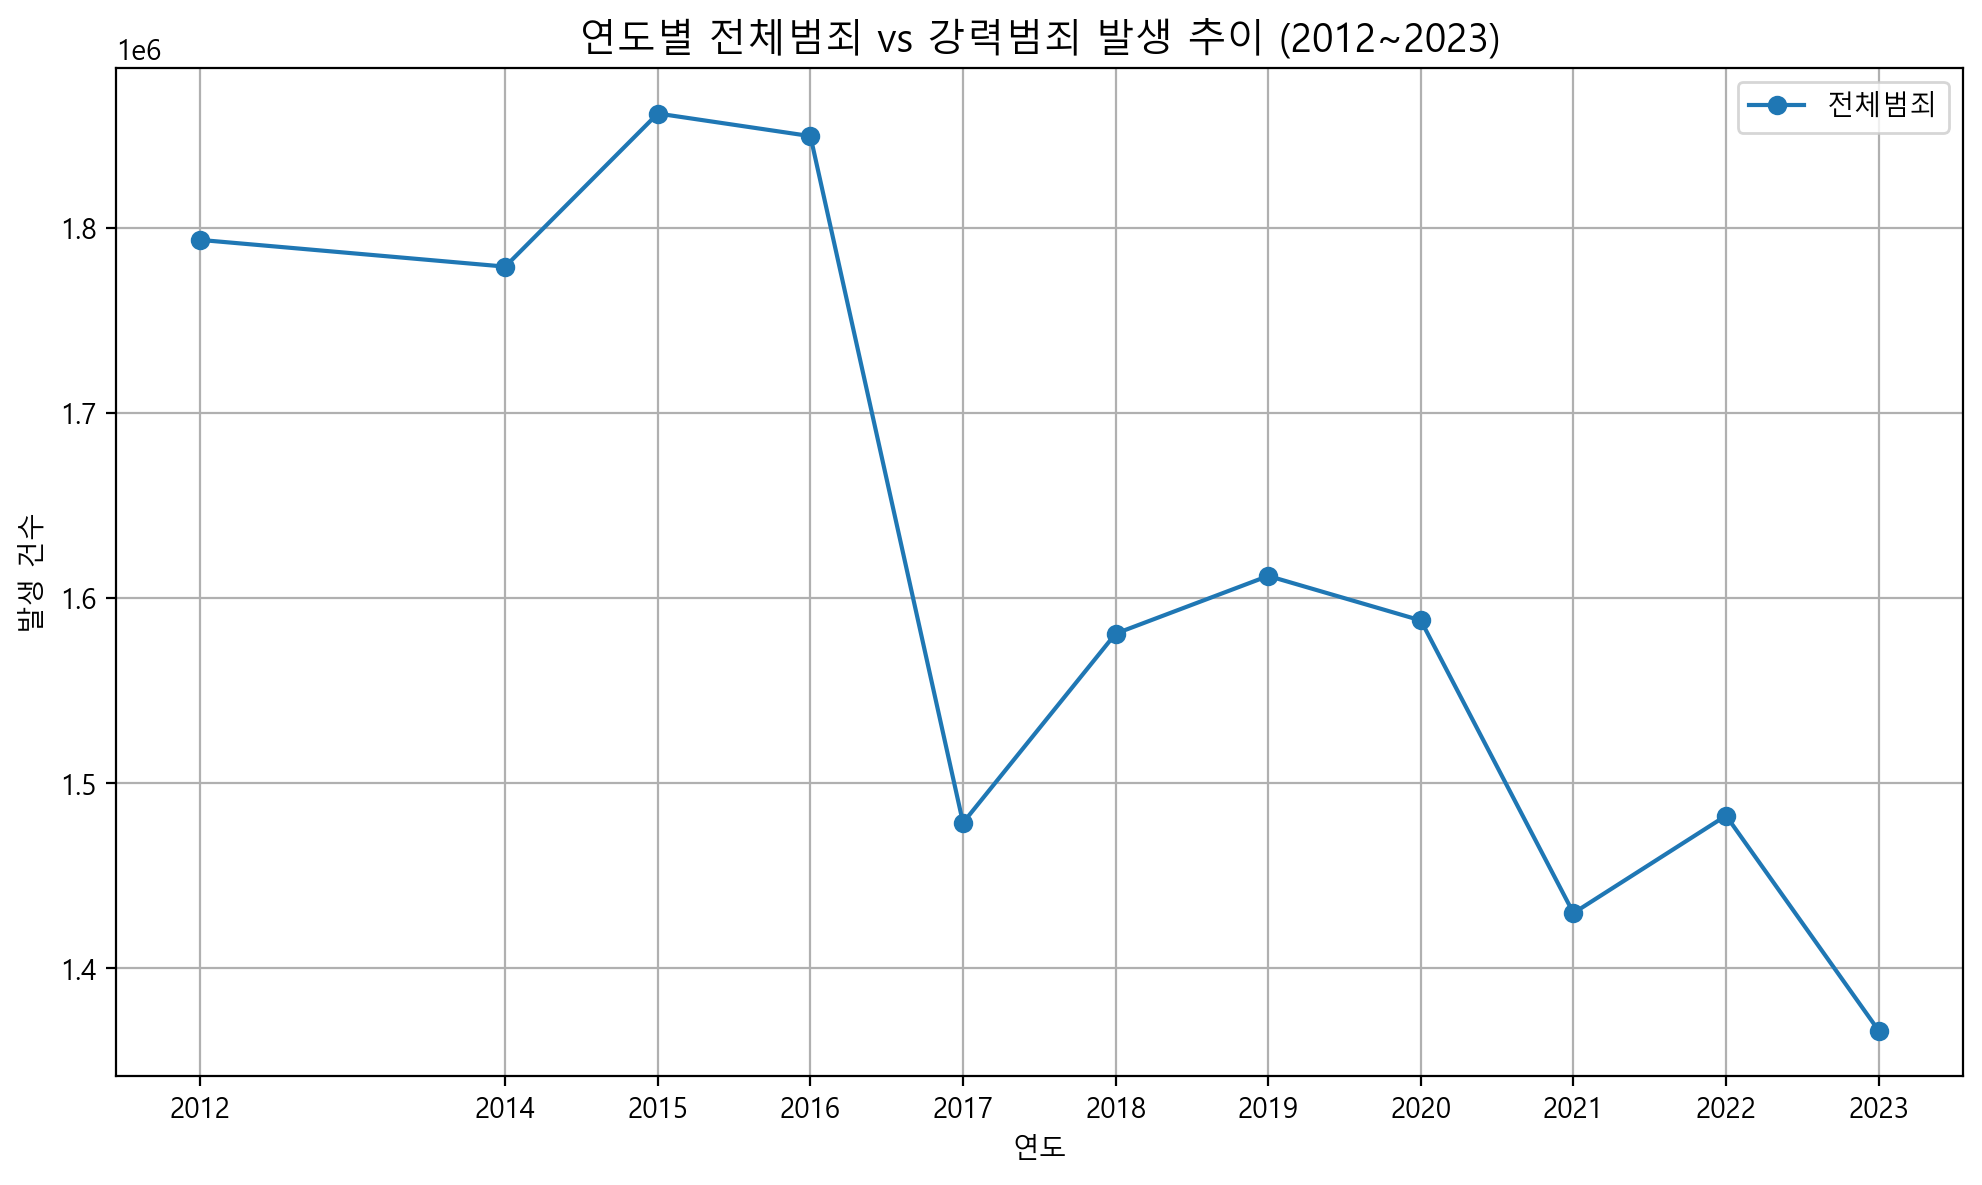

In [ ]:
# 📈 전체범죄 그래프
plt.figure(figsize=(10, 6))
plt.plot(summary_df['year'], summary_df['전체범죄건수'], marker='o', label='전체범죄')
plt.title('연도별 전체범죄 vs 강력범죄 발생 추이 (2012~2023)', fontsize=14)
plt.xlabel('연도')
plt.ylabel('발생 건수')
plt.legend()
plt.grid(True)
plt.xticks(summary_df['year'])
plt.tight_layout()
plt.show()


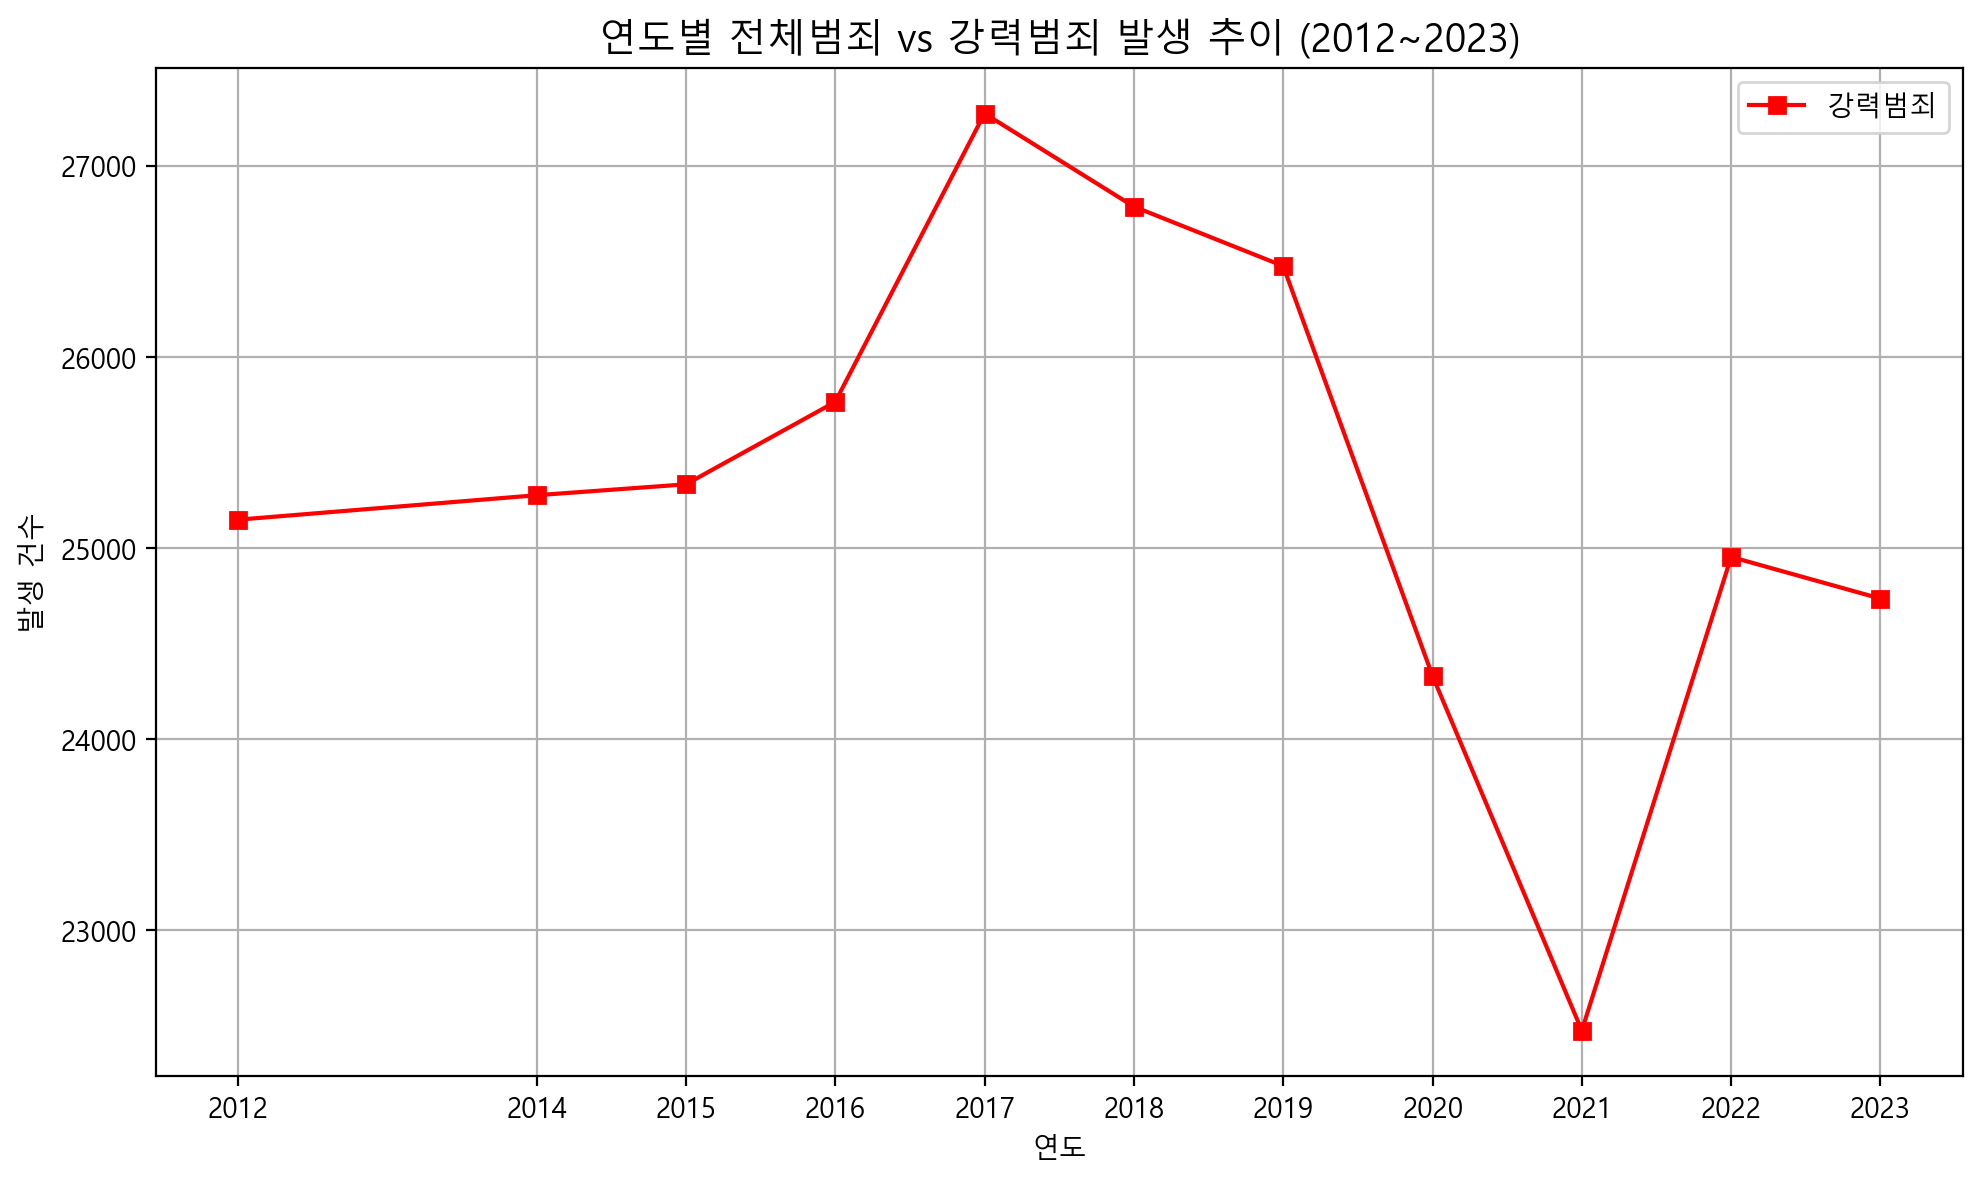

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(summary_df['year'], summary_df['강력범죄건수'], marker='s', label='강력범죄', color='red')
plt.title('연도별 전체범죄 vs 강력범죄 발생 추이 (2012~2023)', fontsize=14)
plt.xlabel('연도')
plt.ylabel('발생 건수')
plt.legend()
plt.grid(True)
plt.xticks(summary_df['year'])
plt.tight_layout()
plt.show()

In [ ]:
# 강력범죄 장소별 총합 계산
violent_place_sum = (
    violent_df[place_columns]
    .apply(pd.to_numeric, errors='coerce')
    .fillna(0)
    .sum()
    .sort_values(ascending=False)
)

most_common_place = violent_place_sum.idxmax()
most_common_place_count = int(violent_place_sum.max())

print(f"가장 강력범죄가 많이 발생한 장소: '{most_common_place}' ({most_common_place_count:,}건)")



📍 가장 강력범죄가 많이 발생한 장소: '기타' (47,169건)


In [ ]:
# 🥇 Top 3 강력범죄 장소
top3_places = violent_place_sum.head(5)

print("강력범죄 발생 장소 Top 5:")
for i, (place, count) in enumerate(top3_places.items(), start=1):
    print(f"{i}. {place} - {int(count):,}건")

강력범죄 발생 장소 Top 5:
1. 기타 - 47,169건
2. 노상 - 39,046건
3. 유흥접객업소 - 28,189건
4. 단독주택 - 26,756건
5. 아파트_연립다세대 - 15,850건


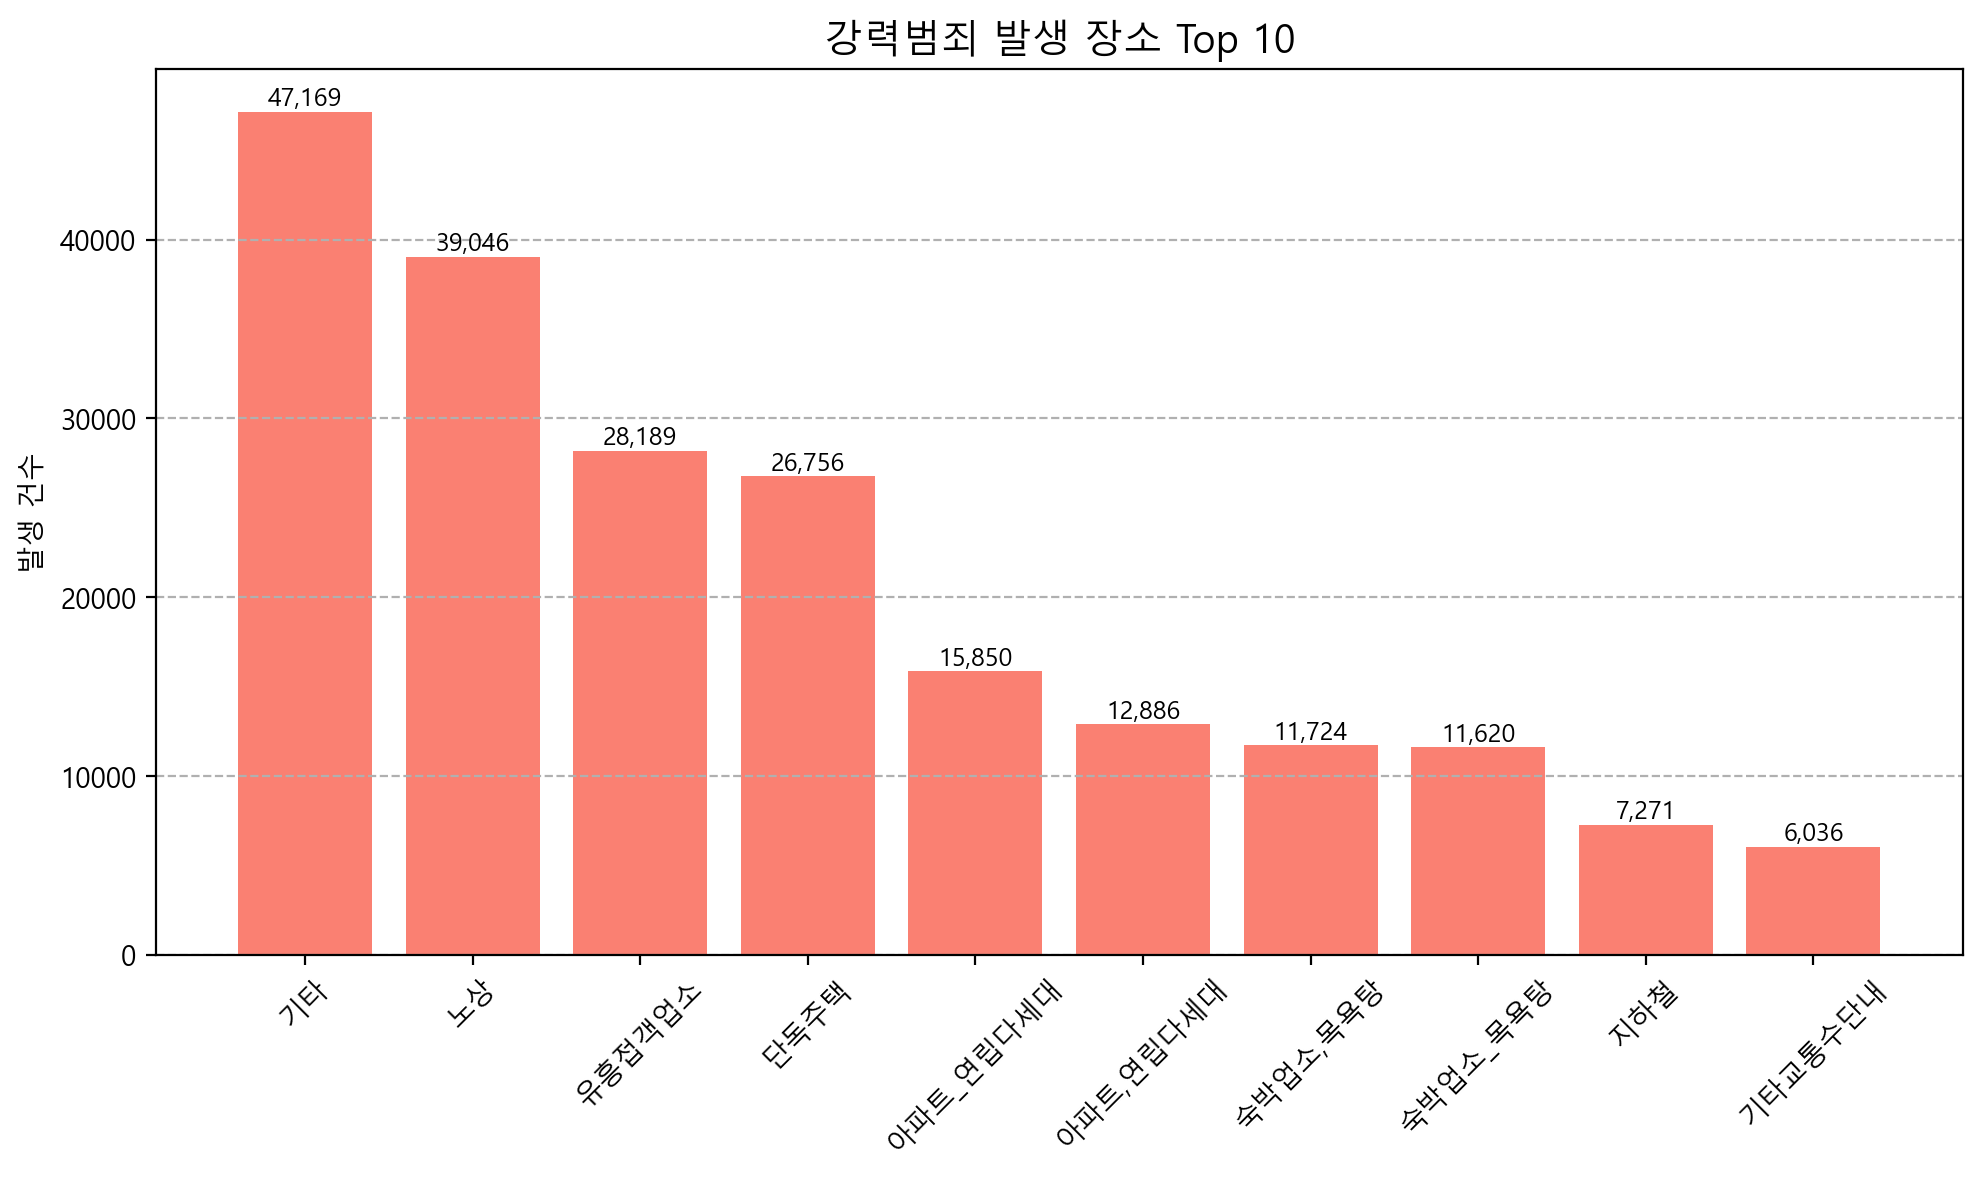

In [ ]:
# 📊 강력범죄 발생 장소 비율 시각화 (상위 10개만)
top_n = 10
top_places = violent_place_sum.head(top_n)

plt.figure(figsize=(10, 6))
bars = plt.bar(top_places.index, top_places.values, color='salmon')
plt.title(f'강력범죄 발생 장소 Top {top_n}', fontsize=14)
plt.ylabel('발생 건수')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')

# 막대 위에 수치 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, f'{int(height):,}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


In [ ]:
years_in_data = []
for file_path in file_list:
    filename = os.path.basename(file_path)
    year = int(''.join(filter(str.isdigit, filename)))
    years_in_data.append(year)

print("✅ 파일에서 추출된 연도:", sorted(years_in_data))


✅ 파일에서 추출된 연도: [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


In [ ]:
print(violent_df['year'].value_counts().sort_index())

year
2012    5
2014    8
2015    8
2016    8
2017    8
2018    8
2019    8
2020    8
2021    8
2022    8
2023    8
Name: count, dtype: int64


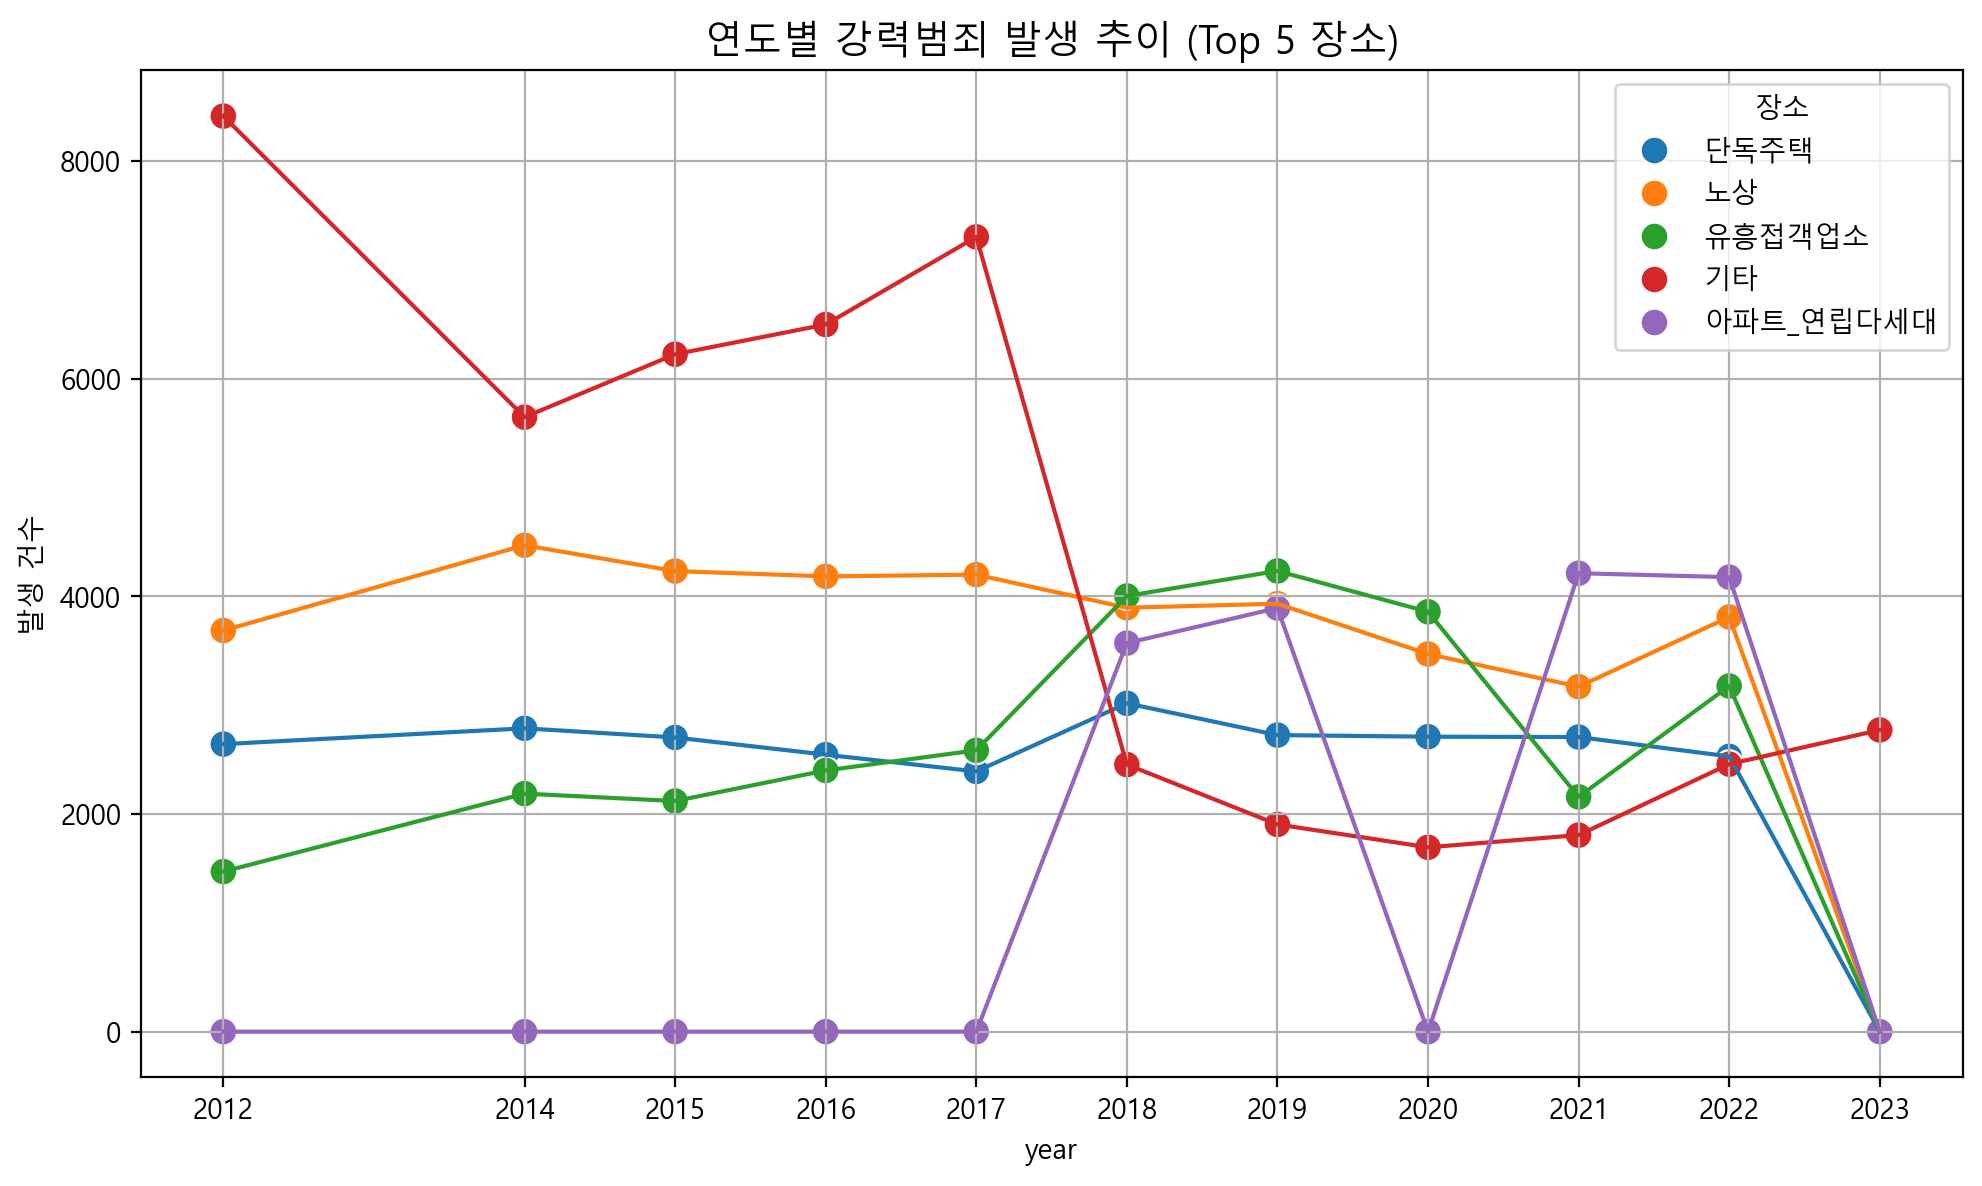

In [ ]:
import seaborn as sns

# 📈 장소별 연도별 강력범죄 합계 (Long 형태로 변환)
violent_by_year_place = (
    violent_df
    .groupby('year')[place_columns]
    .sum()
    .reset_index()
    .melt(id_vars='year', var_name='장소', value_name='건수')
)

# 일부 장소만 시각화 (예: Top 5 장소만 추출해서 표시)
top5_places = violent_place_sum.head(5).index.tolist()
subset_df = violent_by_year_place[violent_by_year_place['장소'].isin(top5_places)]

# Seaborn 산점도 (점 + 선)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=subset_df, x='year', y='건수', hue='장소', palette='tab10', s=100)
sns.lineplot(data=subset_df, x='year', y='건수', hue='장소', palette='tab10', legend=False)

plt.title('연도별 강력범죄 발생 추이 (Top 5 장소)', fontsize=14)
plt.ylabel('발생 건수')
plt.xticks(subset_df['year'].unique())
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\tjdwn\AppData\Local\Temp\ipykernel_25464\1340366271.py:22: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from current font.
  plt.tight_layout()
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


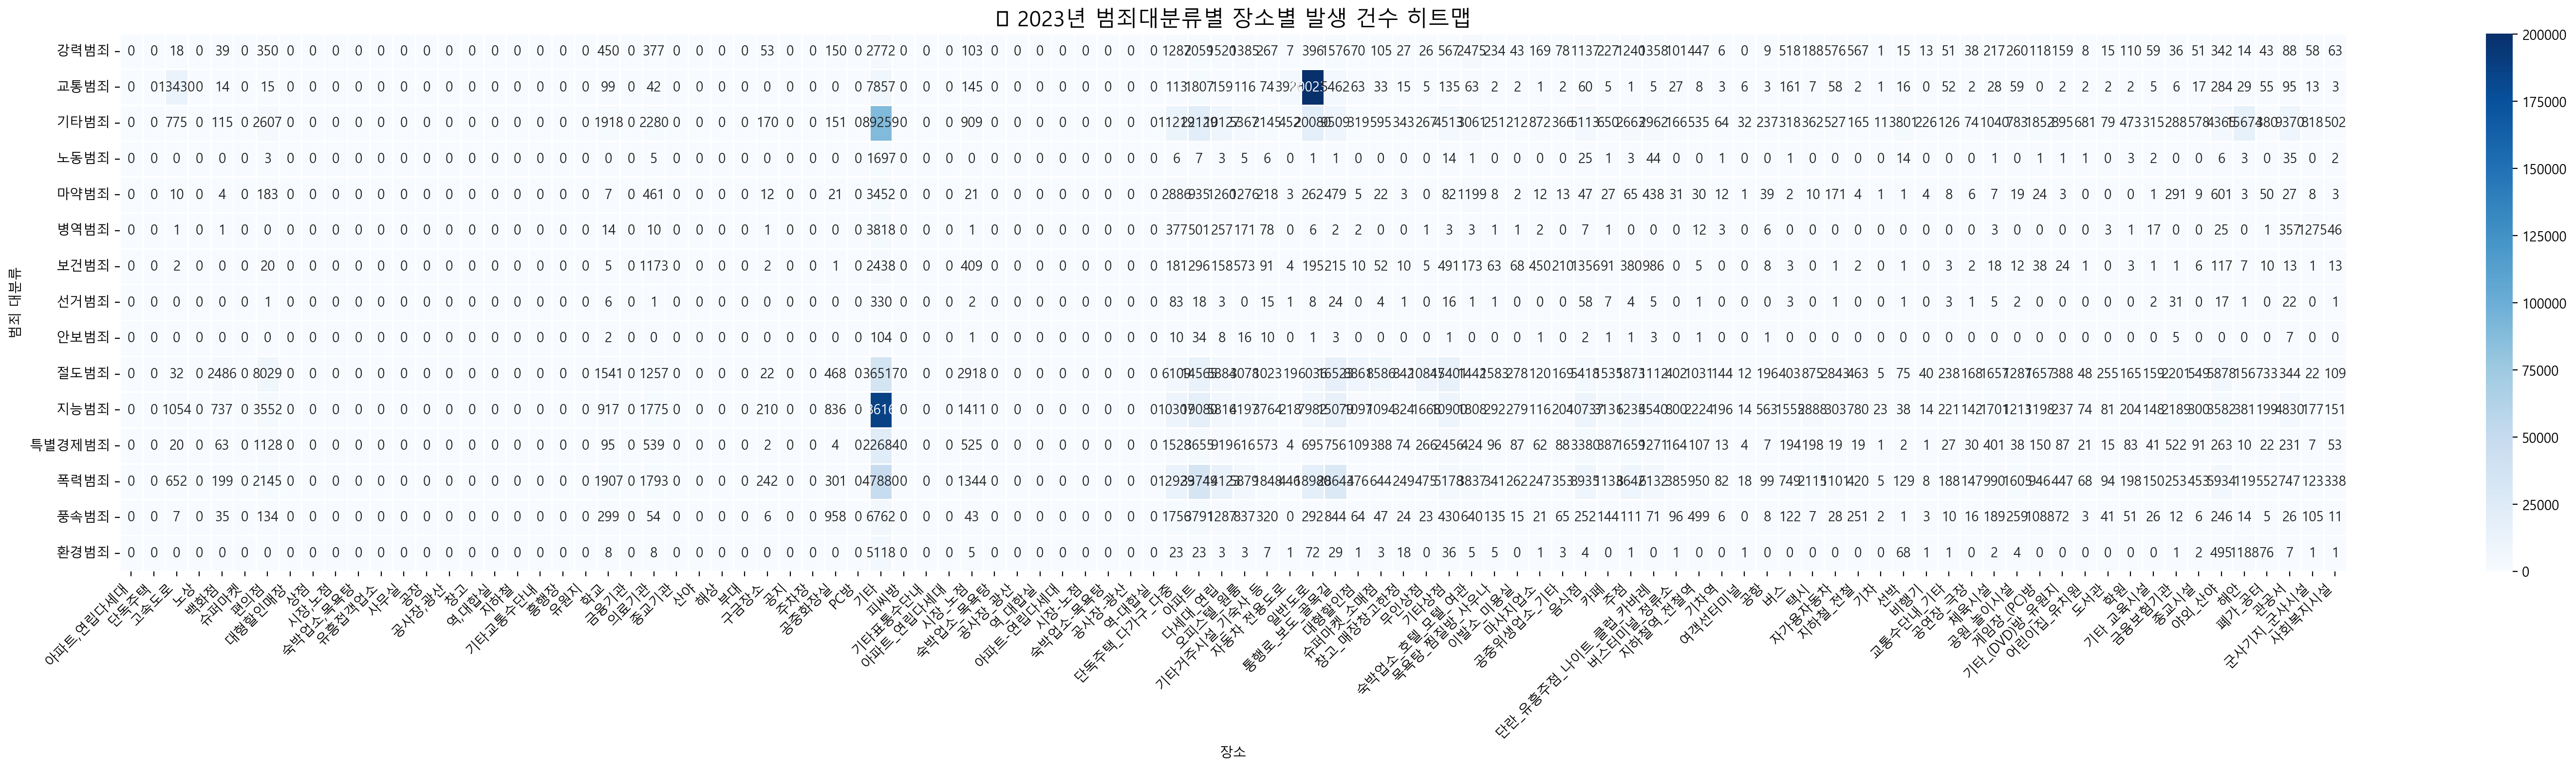

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 2023년 데이터만 필터링
df_2023 = full_df[full_df['year'] == 2023].copy()

# 숫자형으로 변환 (장소별 컬럼)
place_df = df_2023[place_columns].apply(pd.to_numeric, errors='coerce').fillna(0)

# 대분류별 장소 합계 계산
heatmap_df = df_2023[['범죄대분류']].join(place_df)
heatmap_summary = heatmap_df.groupby('범죄대분류')[place_columns].sum()

# 히트맵 시각화
plt.figure(figsize=(30, 8))
sns.heatmap(heatmap_summary, cmap='Blues', annot=True, fmt='.0f', linewidths=0.5);

plt.title("📌 2023년 범죄대분류별 장소별 발생 건수 히트맵", fontsize=16)
plt.xlabel("장소")
plt.ylabel("범죄 대분류")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



이렇게 보면 도로에서의 교통범죄가 가장 높고, 기타 범죄와 지능 범죄의 기타 장소, 골목길에서의 폭력범죄가 높게 나타남을 알 수 있다. 

C:\Users\tjdwn\AppData\Local\Temp\ipykernel_25464\2219272931.py:36: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  plt.tight_layout()
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


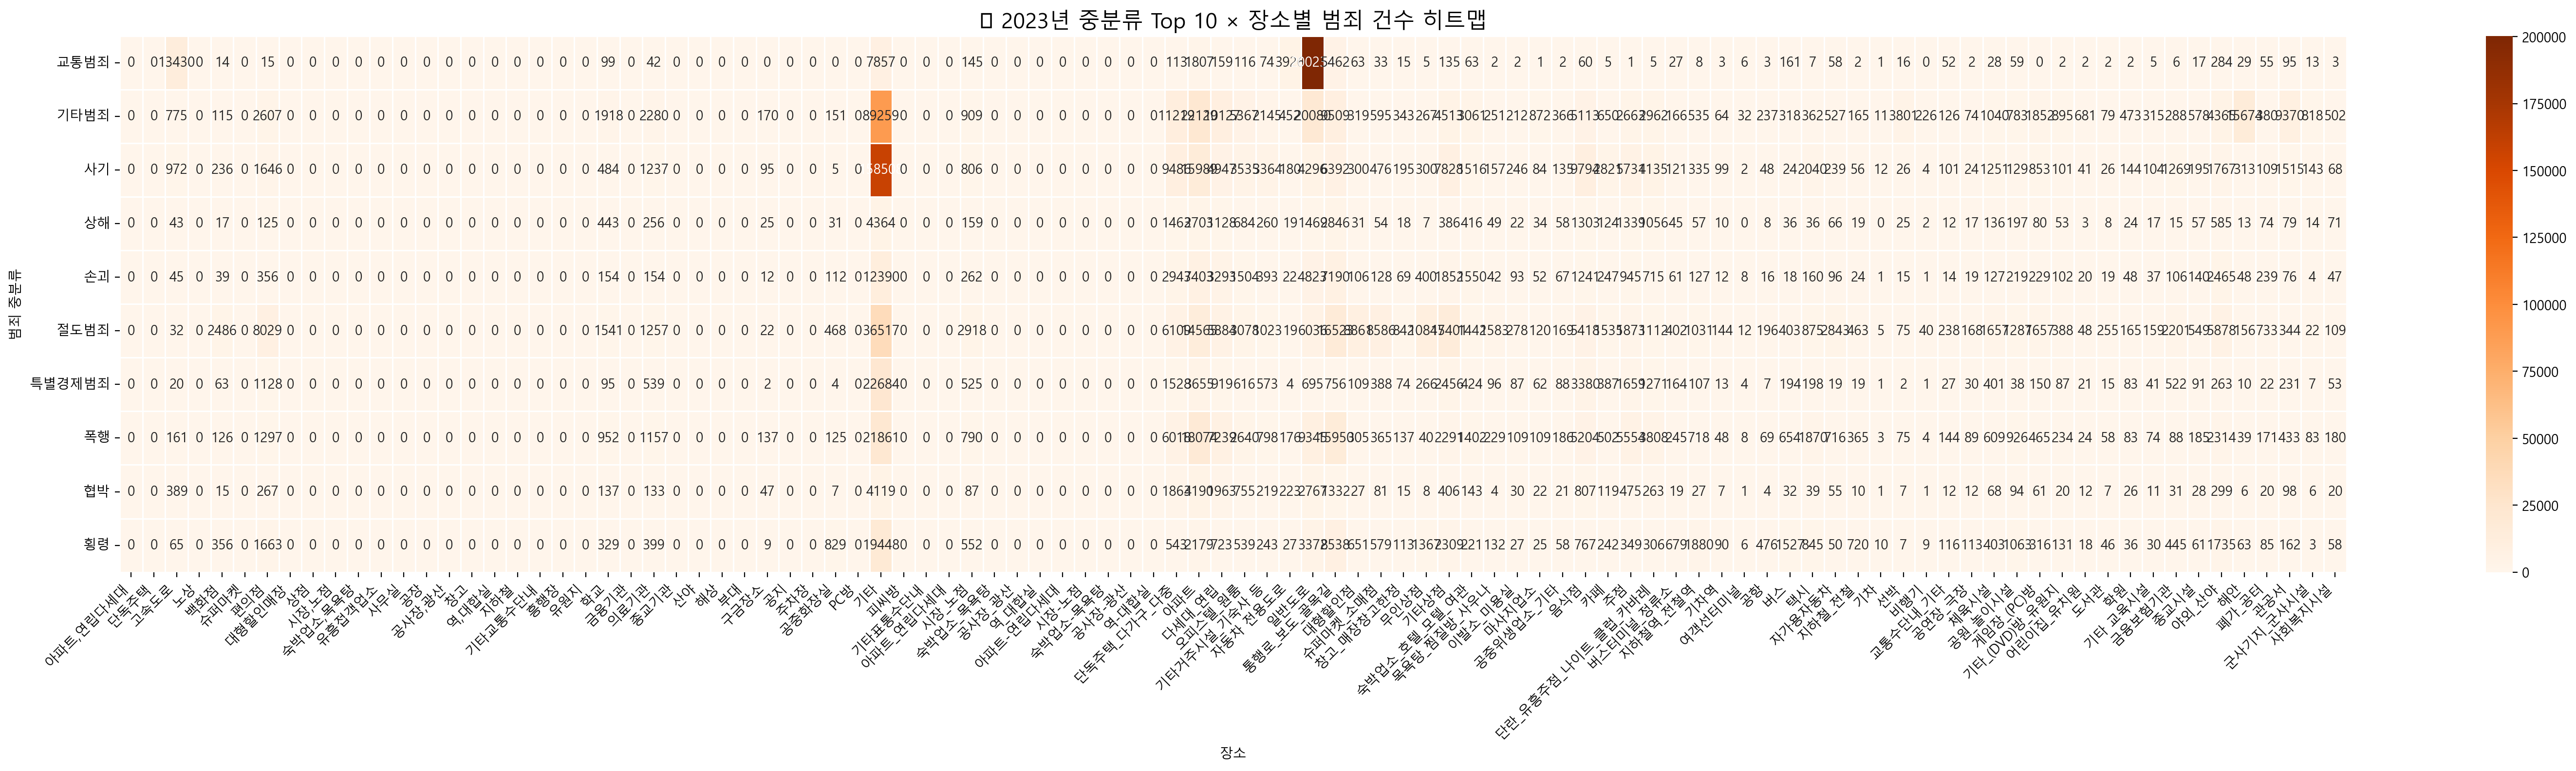

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 🎯 2023년 데이터만 필터링
df_2023 = full_df[full_df['year'] == 2023].copy()

# 숫자형으로 변환 (장소별 컬럼)
place_df = df_2023[place_columns].apply(pd.to_numeric, errors='coerce').fillna(0)

# ▶️ 중분류별 총 범죄 수 계산
df_2023['총합'] = place_df.sum(axis=1)
middle_total = df_2023.groupby('범죄중분류')['총합'].sum().sort_values(ascending=False)

# 🎯 발생이 많은 중분류 Top 10 선택
top_middle_categories = middle_total.head(10).index.tolist()

# 🔍 Top10 중분류만 필터링
filtered_df = df_2023[df_2023['범죄중분류'].isin(top_middle_categories)]

# ▶️ 장소별 합계
middle_place_summary = (
    filtered_df.groupby('범죄중분류')[place_columns]
    .sum()
    .apply(pd.to_numeric, errors='coerce')
    .fillna(0)
)

# 📊 히트맵 시각화
plt.figure(figsize=(30, 8))
sns.heatmap(middle_place_summary, cmap='Oranges', annot=True, fmt='.0f', linewidths=0.5)

plt.title("🔥 2023년 중분류 Top 10 × 장소별 범죄 건수 히트맵", fontsize=16)
plt.xlabel("장소")
plt.ylabel("범죄 중분류")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
